<a href="https://colab.research.google.com/github/hakankocaman/PratikPythonAraclari/blob/master/Error_Calculator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


def calculate_errors(reference, data):
    """
    Calculates the different error metrics between the reference and data arrays.

    Parameters:
    reference (np.ndarray): Reference data array.
    data (np.ndarray): Data array to compare.

    Returns:
    tuple: Error metrics in the form of (M, ME, MAE, RMSE, SDE, MaxE, MAD).
    """
    errors = data - reference
    M = np.mean(data)
    ME = np.mean(errors)
    MAE = np.mean(np.abs(errors))
    RMSE = np.sqrt(np.mean(errors**2))  # Adjusted RMSE calculation
    SDE = np.std(errors)
    MaxE = np.max(np.abs(errors))
    MAD = np.median(np.abs(errors - np.median(errors)))
    return M, ME, MAE, RMSE, SDE, MaxE, MAD

# Path to Excel file (enter your own file path here)
excel_file_path = 'point_datas.xlsx'

# Load data from Excel
df = pd.read_excel(excel_file_path, decimal=',')
print(df)

# Get start and end points from user
while True:
    try:
        start_point = input("Enter the starting point (e.g. b.107): ")
        end_point = input("Enter the end point (e.g. b.111): ")

        # Check if the entered points are in the dataset
        if start_point not in df['Point No'].values or end_point not in df['Point No'].values:
            raise ValueError("The entered points were not found in the dataset.")

        # Make sure the start point comes before the end point
        if df[df['Point No'] == start_point].index[0] > df[df['Point No'] == end_point].index[0]:
            raise ValueError("The start point cannot be after the end point.")

        break  # If everything is correct exit the loop
    except ValueError as e:
        print(f"Error: {e}. Please try again.")

# Filtering operation: Get only points in the specified range
filtered_df = df[(df['Point No'] >= start_point) & (df['Point No'] <= end_point)]

# Calculations
results = {}
for method in ['TG03', 'Google', 'HGM']:
    results[method] = calculate_errors(filtered_df['I_elipsoid'].values, filtered_df[method].values)

df_results = pd.DataFrame(results, index=["M", "ME", "MAE", "RMSE", "SDE", "MaxE", "MAD"]).T
df_results = df_results.round(3)

# Print the table
print(f"\n{start_point}-{end_point} Range Error Metrics:")
print(df_results)

# Export df_results to Excel
output_file_path = f"\n{start_point}-{end_point}.xlsx"
df_results.to_excel(output_file_path, index=True)

print(f"Error metrics were successfully saved to file '{output_file_path}'.")

   Point No  I_elipsoid     TG03      Google     HGM
0      b.52      76.076   74.720   77.779091   83.31
1      b.58      72.361   71.011   74.302055   81.15
2      b.59      72.748   71.399   73.540100   80.24
3      b.61      73.064   71.716   72.592484   79.82
4      b.62      73.833   72.486   71.228729   80.44
..      ...         ...      ...         ...     ...
76    b.248     135.120  133.784  140.769135  142.84
77    b.249     133.851  132.515  141.947739  142.22
78    b.251     133.882  132.546  143.937576  141.72
79    b.252     134.178  132.842  144.033890  141.33
80    b.256     135.402  134.067  142.481186  139.73

[81 rows x 5 columns]
Enter the starting point (e.g. b.107): b.58
Enter the end point (e.g. b.111): b.77

b.58-b.77 Range Error Metrics:
             M     ME    MAE   RMSE    SDE   MaxE    MAD
TG03    74.008 -1.346  1.346  1.346  0.002  1.350  0.002
Google  71.824 -3.530  3.921  4.440  2.692  6.790  1.792
HGM     78.661  3.307  3.367  4.453  2.983  8.789  2.12

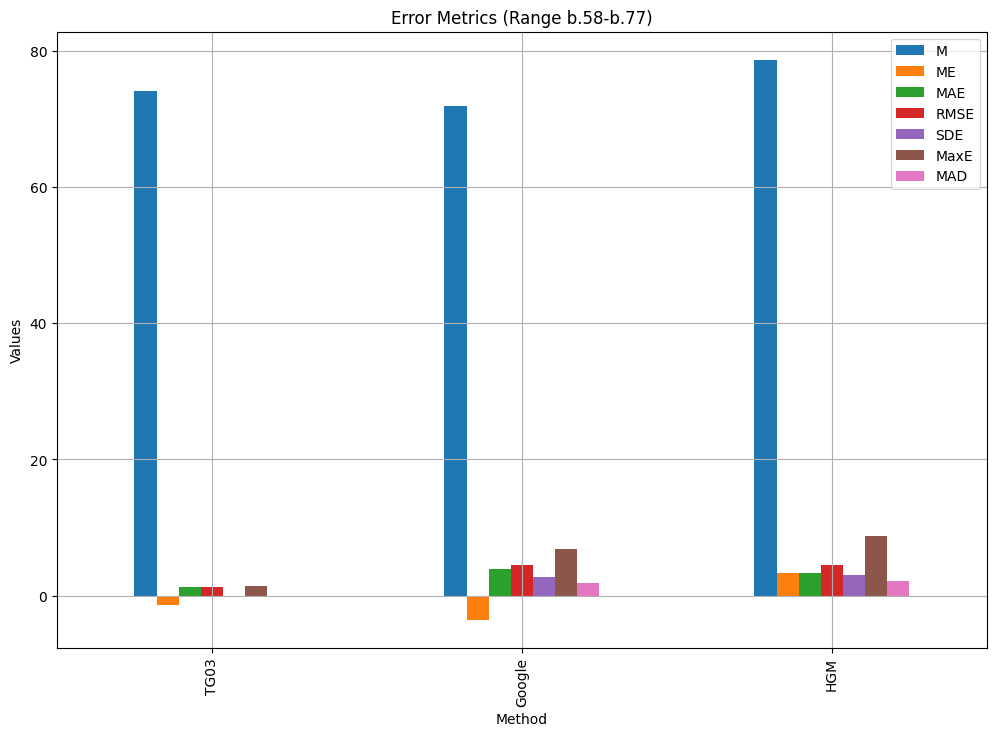

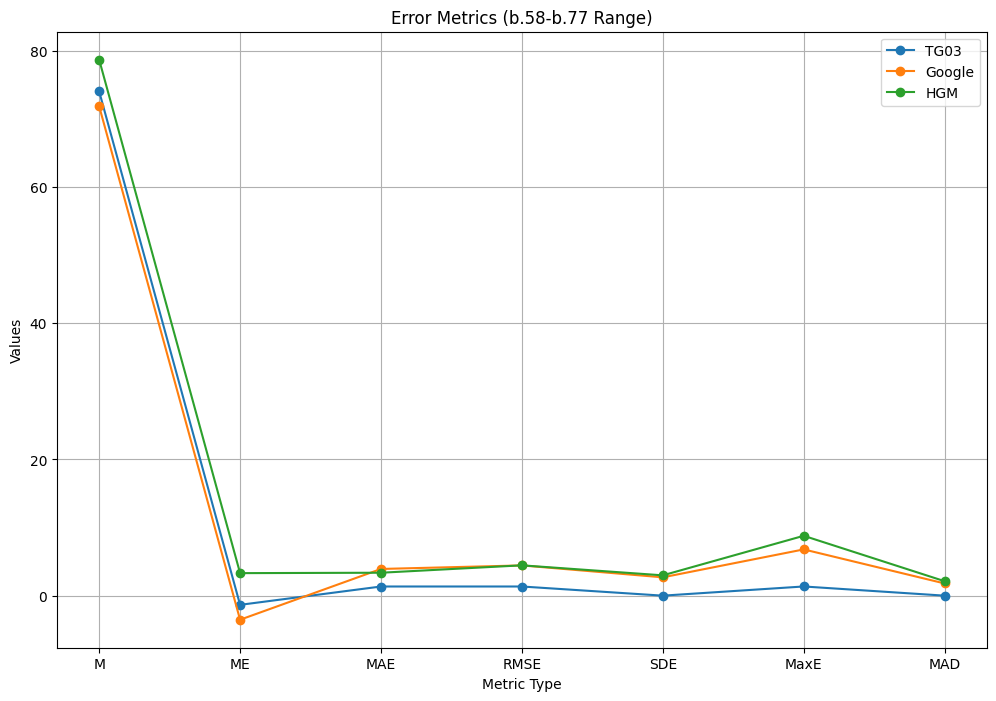

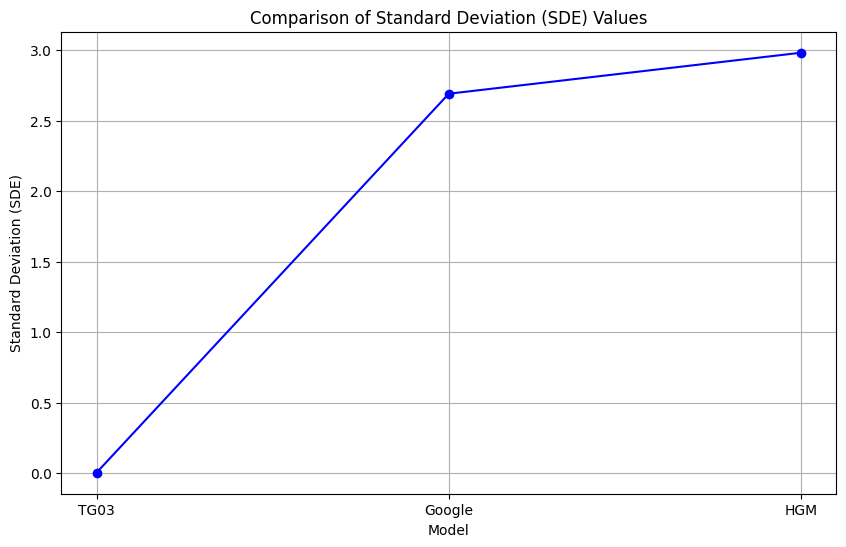

In [5]:

# Creating a bar chart
df_results.plot(kind='bar', figsize=(12, 8))
plt.title(f'Error Metrics (Range {start_point}-{end_point})')
plt.xlabel('Method')
plt.ylabel('Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()

# Creating a line chart
plt.figure(figsize=(12, 8))
for method in df_results.index:
    plt.plot(df_results.columns, df_results.loc[method], marker='o', label=method)

plt.title(f'Error Metrics ({start_point}-{end_point} Range)')
plt.xlabel('Metric Type')
plt.ylabel('Values')
plt.legend(loc='best')
plt.grid(True)
plt.show()


# Get standard deviation (SDE) values
sde_values = df_results['SDE']

# Creating a line chart
plt.figure(figsize=(10, 6))
plt.plot(sde_values.index, sde_values, marker='o', linestyle='-', color='b')
plt.title('Comparison of Standard Deviation (SDE) Values')
plt.xlabel('Model')
plt.ylabel('Standard Deviation (SDE)')
plt.grid(True)
plt.show()

   Point No  I_elipsoid     TG03      Google     HGM
0      b.52      76.076   74.720   77.779091   83.31
1      b.58      72.361   71.011   74.302055   81.15
2      b.59      72.748   71.399   73.540100   80.24
3      b.61      73.064   71.716   72.592484   79.82
4      b.62      73.833   72.486   71.228729   80.44
..      ...         ...      ...         ...     ...
76    b.248     135.120  133.784  140.769135  142.84
77    b.249     133.851  132.515  141.947739  142.22
78    b.251     133.882  132.546  143.937576  141.72
79    b.252     134.178  132.842  144.033890  141.33
80    b.256     135.402  134.067  142.481186  139.73

[81 rows x 5 columns]

Group 1 Metrikleri:
             M    SDE    MAD
TG03    74.008  1.675  1.208
Google  71.824  1.872  1.919
HGM     78.661  1.745  1.890
Error metrics successfully saved to file '
Group 1.xlsx'.

Group 2 Metrikleri:
              M    SDE    MAD
TG03    102.262  0.450  0.288
Google   99.746  0.966  0.800
HGM     108.466  1.192  1.130
Error

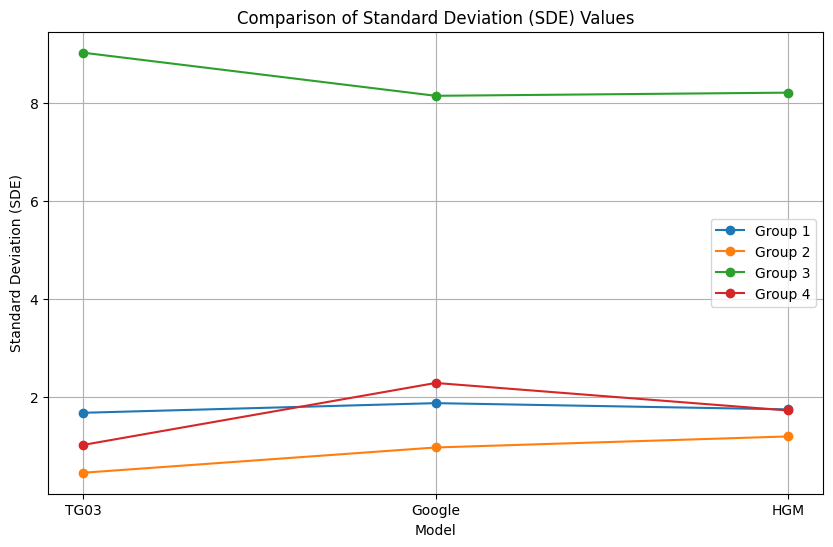

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def calculate_metrics(data):
    """
    Calculates the mean (M), standard deviation of errors (SDE), and median absolute deviation (MAD) metrics for data sets.

    Parameters:
    data (np.ndarray): Data set.

    Returns:
    tuple: Metrics in the form of (M, SDE, MAD).
    """

    M = np.mean(data)
    SDE = np.std(data)
    MAD = np.median(np.abs(data - np.median(data)))
    return M, SDE, MAD

# Path to Excel file (enter your own file path here)
excel_file_path = 'point_datas.xlsx'

# Load data from Excel
df = pd.read_excel(excel_file_path, decimal=',')
print(df)

# Start and end points of groups
groups = [
    ('b.58', 'b.77'),
    ('b.107', 'b.111'),
    ('b.146', 'b.225'),
    ('b.239', 'b.256')
]

# Calculations for each group
group_results = {}
for group_num, (start_point, end_point) in enumerate(groups, start=1):
    # Filtering operation: Get only points in the specified range
    filtered_df = df[(df['Point No'] >= start_point) & (df['Point No'] <= end_point)]

    results = {}
    for method in ['TG03', 'Google', 'HGM']:
        results[method] = calculate_metrics(filtered_df[method].values)

    group_results[f'Group {group_num}'] = pd.DataFrame(results, index=["M", "SDE", "MAD"]).T

# Print metrics for each group
for group_name, result_df in group_results.items():
    print(f"\n{group_name} Metrics:")
    result_df=result_df.round(3)
    print(result_df)
    # Export df_results to Excel
    output_file_path = f"\n{group_name}.xlsx"
    result_df.to_excel(output_file_path, index=True)
    print(f"Error metrics successfully saved to file '{output_file_path}'.")

# Displaying Standard Deviation (SDE) Values ​​in Line Graph
plt.figure(figsize=(10, 6))

for group_name, result_df in group_results.items():
    plt.plot(result_df.index, result_df['SDE'], marker='o', linestyle='-', label=group_name)

plt.title('Comparison of Standard Deviation (SDE) Values')
plt.xlabel('Model')
plt.ylabel('Standard Deviation (SDE)')
plt.legend()
plt.grid(True)
plt.show()


# Yeni Bölüm